In [19]:
import torch

In [20]:
expl_method = "GradCAM"
# expl_method = 'LayerXAct'
# expl_method = 'LayerDL'
# transform = False
# transform = True
transform = ['spatial']
# transform = ['spatial', 'noise', 'color']
# transform = None
tester = "ConfAOPC"
# tester = "OrigAOPC"
seed = 0
mode = "insertion"

In [21]:
total_results = []

for i in range(0, 10, 1):
    log_name = f"./aopc_results/{tester}_transform_{transform}_mode_{mode}_expl_method_{expl_method}_seed_{seed}_batch_num_{i}.pt"
    print(log_name)
    try:
        log = torch.load(log_name)
        total_results.append(log)
    except:
        continue

print(total_results)
total_results = torch.stack(total_results)

./aopc_results/ConfAOPC_transform_['spatial']_mode_insertion_expl_method_GradCAM_seed_0_batch_num_0.pt
./aopc_results/ConfAOPC_transform_['spatial']_mode_insertion_expl_method_GradCAM_seed_0_batch_num_1.pt
./aopc_results/ConfAOPC_transform_['spatial']_mode_insertion_expl_method_GradCAM_seed_0_batch_num_2.pt
./aopc_results/ConfAOPC_transform_['spatial']_mode_insertion_expl_method_GradCAM_seed_0_batch_num_3.pt
./aopc_results/ConfAOPC_transform_['spatial']_mode_insertion_expl_method_GradCAM_seed_0_batch_num_4.pt
./aopc_results/ConfAOPC_transform_['spatial']_mode_insertion_expl_method_GradCAM_seed_0_batch_num_5.pt
./aopc_results/ConfAOPC_transform_['spatial']_mode_insertion_expl_method_GradCAM_seed_0_batch_num_6.pt
./aopc_results/ConfAOPC_transform_['spatial']_mode_insertion_expl_method_GradCAM_seed_0_batch_num_7.pt
./aopc_results/ConfAOPC_transform_['spatial']_mode_insertion_expl_method_GradCAM_seed_0_batch_num_8.pt
./aopc_results/ConfAOPC_transform_['spatial']_mode_insertion_expl_method_

In [22]:
total_results = total_results.mean(0)

In [23]:
total_results

tensor([[0.0011, 0.0028, 0.0058, 0.0080, 0.0134, 0.0198, 0.0234, 0.0277, 0.0372,
         0.0442, 0.0529, 0.0597, 0.0673, 0.0799, 0.0966, 0.1057, 0.1207, 0.1358,
         0.1483, 0.1593, 0.1668],
        [0.0011, 0.0027, 0.0070, 0.0098, 0.0139, 0.0205, 0.0243, 0.0293, 0.0409,
         0.0468, 0.0553, 0.0666, 0.0732, 0.0841, 0.1006, 0.1110, 0.1250, 0.1387,
         0.1402, 0.1486, 0.1573]])

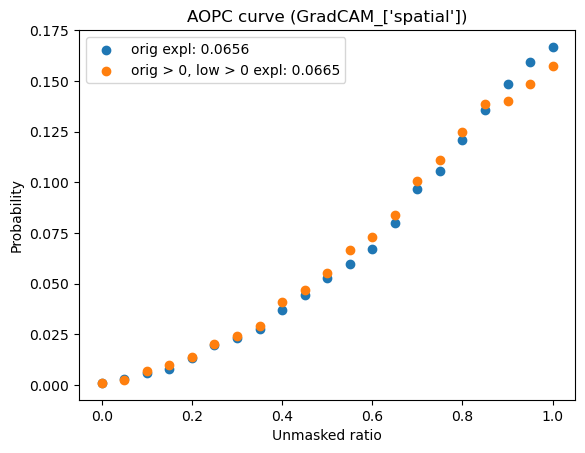

tensor(0.0656) tensor(0.0665)


In [18]:
import matplotlib.pyplot as plt
import numpy as np

if tester == "OrigAOPC":
    plt.scatter(np.arange(0, 1, 0.05), total_results[0], label = f"orig expl: {total_results[0].mean():.4f}")
    plt.scatter(np.arange(0, 1, 0.05), total_results[1], label = f"conf_high expl: {total_results[1].mean():.4f}")
    plt.scatter(np.arange(0, 1, 0.05), total_results[2], label = f"conf_low expl: {total_results[2].mean():.4f}")
elif tester == "ConfAOPC":
    plt.scatter(np.arange(0, 1.05, 0.05), total_results[0], label = f"orig expl: {total_results[0].mean():.4f}")
    plt.scatter(np.arange(0, 1.05, 0.05), total_results[1], label = f"orig > 0, low > 0 expl: {total_results[1].mean():.4f}")
    
plt.legend()
plt.title(f"AOPC curve ({expl_method}_{transform})")
plt.xlabel("Unmasked ratio")
plt.ylabel("Probability")

plt.show()

print(total_results[0].mean(), total_results[1].mean())

